<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/CNN_Embeddings_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten
from keras import optimizers

Using TensorFlow backend.


In [0]:
num_features = 300
sequence_length = 300
embedding_dimension = 100

In [3]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_features)

print(X_train.shape, Y_train.shape)

17465344/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)


In [0]:
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

In [0]:
def cnn_embed():
  model = Sequential()
  
  # Embedding layer to create vector representation of each word, fine-tunde every iteration
  model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
  model.add(Conv1D(filters = 50, kernel_size = 5, strides = 1, padding ='valid'))
  model.add(MaxPooling1D(2, padding = 'valid'))
  
  model.add(Flatten())
  
  model.add(Dense(10))
  model.add(Activation('relu'))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  
  adam = optimizers.Adam()
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  
  return model

In [6]:
model = cnn_embed()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
training_history = model.fit(X_train, Y_train, batch_size = 50, epochs = 100, validation_split = 0.2, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 8s 424us/step - loss: 0.6935 - acc: 0.4958 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/100
20000/20000 [==============================] - 4s 189us/step - loss: 0.6452 - acc: 0.5710 - val_loss: 0.4954 - val_acc: 0.7580
Epoch 3/100
20000/20000 [==============================] - 4s 190us/step - loss: 0.4517 - acc: 0.7894 - val_loss: 0.4497 - val_acc: 0.7928
Epoch 4/100
20000/20000 [==============================] - 4s 190us/step - loss: 0.3979 - acc: 0.8191 - val_loss: 0.4645 - val_acc: 0.7816
Epoch 5/100
20000/20000 [==============================] - 4s 187us/step - loss: 0.3272 - acc: 0.8617 - val_loss: 0.4832 - val_acc: 0.7778
Epoch 6/100
20000/20000 [==============================] - 4s 185us/step - loss: 0.2448 - acc: 0.9042 - val_loss: 0.5529 - val_acc: 0.7692
Epoch 7/100
20000/20000 [==============================] - 4s 186us/s

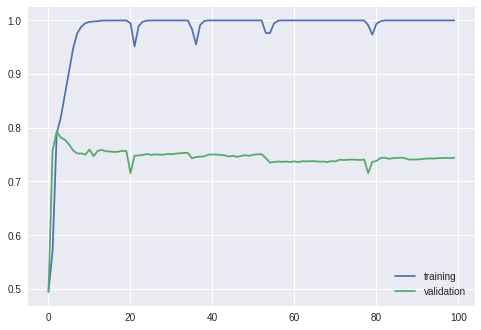

In [8]:
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.show()

In [9]:
results = model.evaluate(X_test, Y_test)
print('Test accuracy', results[1])

25000/25000 [==============================] - 2s 85us/step
Test accuracy 0.7458
